# Variance Inflation Factor (VIF) Test Example


## Concept Illustration


![VIF Illustration](Bowman_VIF_Image.png)


## When to Use VIF


Researchers and data analysts should perform a VIF test when conducting multiple regression analysis with several predictor variables. This test is particularly important when there's suspicion that some predictors might be strongly correlated with each other. Multicollinearity can lead to inflated standard errors, unstable coefficient estimates, and difficulties in determining the individual importance of predictors. By calculating VIF values, analysts can identify problematic variables that may need to be removed or transformed before proceeding with the regression analysis. The test is widely used in fields such as economics, social sciences, epidemiology, and any discipline where multiple regression is a common analytical tool. Addressing multicollinearity through VIF analysis leads to more reliable, interpretable, and robust regression models.


VIF for data with low multicollinearity:
  Variable       VIF
0       X1  1.056184
1       X2  1.019085
2       X3  1.037920

VIF for data with high multicollinearity:
  Variable         VIF
0       X1  137.825758
1       X2   92.745157
2       X3  198.951492


/var/folders/t5/dwmdtq7154jfvzcls5ldj3540000gn/T/ipykernel_68027/739264120.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


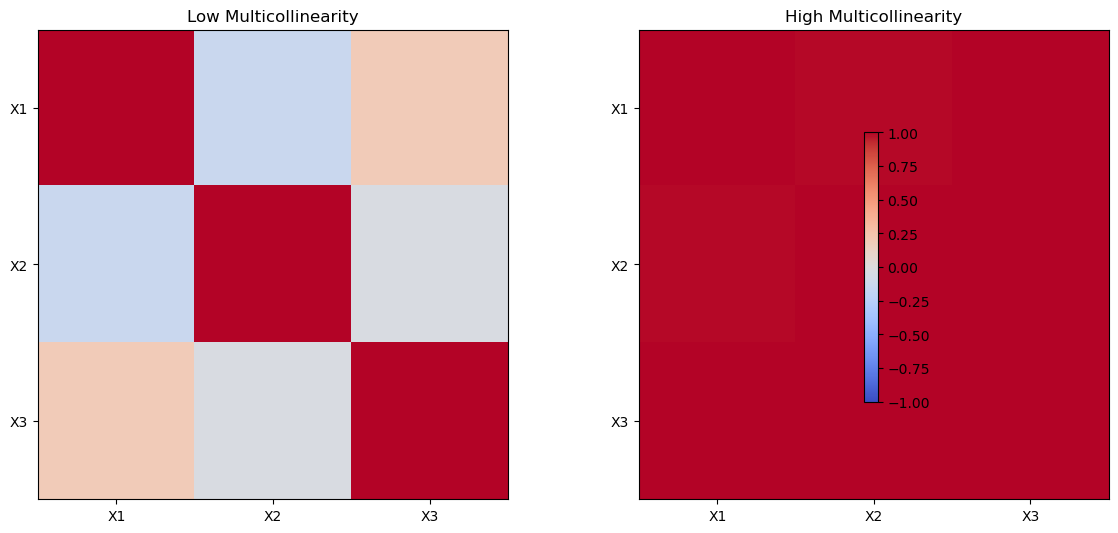


Interpretation:
- VIF values close to 1 indicate low multicollinearity
- VIF values > 5 suggest moderate multicollinearity
- VIF values > 10 indicate severe multicollinearity that should be addressed


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Defining VIF function directly in notebook
def calculate_vif(X, return_dataframe=True):
   # Converts to DataFrame if not already
   if not isinstance(X, pd.DataFrame):
       X = pd.DataFrame(X)


   # Calculate VIF for each variable
   vif_data = {}
   for col in X.columns:
       # Features that will be used as predictors (all except the current one)
       features = [x for x in X.columns if x != col]
      
       # Fit linear regression
       X_features = X[features]
       y = X[col]
       reg = LinearRegression().fit(X_features, y)
      
       # Calculate R-squared
       r2 = reg.score(X_features, y)
      
       # Calculate VIF
       vif_data[col] = 1 / (1 - r2)
  
   if return_dataframe:
       vif_df = pd.DataFrame({
           "Variable": list(vif_data.keys()),
           "VIF": list(vif_data.values())
       })
       return vif_df
  
   return vif_data




# Set a random seed for reproducibility
np.random.seed(42)


# Generate data with low multicollinearity
n = 100
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)
X3 = np.random.normal(0, 1, n)


# Create a DataFrame with low multicollinearity
df_low = pd.DataFrame({
   'X1': X1,
   'X2': X2,
   'X3': X3
})


# Generate data with high multicollinearity
X1_high = np.random.normal(0, 1, n)
X2_high = 0.9 * X1_high + np.random.normal(0, 0.1, n)  # X2 highly correlated with X1
X3_high = 0.8 * X1_high + 0.7 * X2_high + np.random.normal(0, 0.1, n)  # X3 correlated with both


# Create a DataFrame with high multicollinearity
df_high = pd.DataFrame({
   'X1': X1_high,
   'X2': X2_high,
   'X3': X3_high
})


# Calculate VIF for both datasets
print("VIF for data with low multicollinearity:")
low_vif = calculate_vif(df_low)
print(low_vif)


print("\nVIF for data with high multicollinearity:")
high_vif = calculate_vif(df_high)
print(high_vif)


# Visualize the correlation matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


# Correlation matrix for low multicollinearity
corr_low = df_low.corr()
im1 = ax1.imshow(corr_low, cmap='coolwarm', vmin=-1, vmax=1)
ax1.set_title('Low Multicollinearity')
ax1.set_xticks(np.arange(len(df_low.columns)))
ax1.set_yticks(np.arange(len(df_low.columns)))
ax1.set_xticklabels(df_low.columns)
ax1.set_yticklabels(df_low.columns)


# Correlation matrix for high multicollinearity
corr_high = df_high.corr()
im2 = ax2.imshow(corr_high, cmap='coolwarm', vmin=-1, vmax=1)
ax2.set_title('High Multicollinearity')
ax2.set_xticks(np.arange(len(df_high.columns)))
ax2.set_yticks(np.arange(len(df_high.columns)))
ax2.set_xticklabels(df_high.columns)
ax2.set_yticklabels(df_high.columns)


# Add a colorbar
fig.colorbar(im2, ax=[ax1, ax2], shrink=0.7)


plt.tight_layout()
plt.show()


# Interpretation
print("\nInterpretation:")
print("- VIF values close to 1 indicate low multicollinearity")
print("- VIF values > 5 suggest moderate multicollinearity")
print("- VIF values > 10 indicate severe multicollinearity that should be addressed")
